<h1><center>Laboratory Exercise: Acoustic Sensors</center></h1>

## Milestone Items
The following are required to complete the milestone for this exercise:
- Part 1
    1. Publish your estimated value of the speed of sound in air to the class MQTT server
    2. Submit to Canvas all three figures you generate using your three lists of `c` values
    3. Submit to Canvas the python code used to create the three figures
- Part 2
    1. Submit to Canvas your figure of the bathymetry along the dock
    2. Submit to Canvas the python code used to create your figure
    
Provide a 2-3 sentence response addressing the questions proposed on the milestone.


# Part 1: Determining the Speed of Sound in Air

For this activity, you will be using a **HCSR04** 40 kHz ultrasonic sensor to determine the speed of sound in air.  This sensor sends out a pulse of sound through one transducer, and listens for the echo return in the second transducer.  Based on the delay between sending the signal and receiving an echo back, you will be able to determine how far away an object is from the sensor.  
In this instance we are unsure of the speed of sound in air.  By collecting measurements at a known distance, we can see how changing the speed of sound affects the accuracy of distance the sensor calculates, and narrow in on the correct value.  

## Assembling your HCSR04 Sensor
Begin by connecting your **HCSR04** to your **ESP8266**.  The HCSR04 requires 5 volts, so for this excersize you will use your microcontroller in a breadboard, powered by the USB cable from your computer.  The USB cable provides 5V to the board, which means we can use the *V+* pin on the ESP8266 to give 5V to the HCSR04.

The HCSR04 sensor has 4 pins, *GND*, *VCC*, *Trig*, and *Echo*.  For this excercise, connect the *trig* pin on the HCSR04 to GPIO pin 12 on the ESP8266, and the *echo* pin to GPIO pin 14.  Connect *GND* to *GND* and *VCC* to *V+*.

The driver for this sensor is already included in the firmware on your **ESP8266** as a module named `hcsr04`.  We can define our sensor using the following code.  We will begin by estimating that the speed of sound in air is **300 meters per second**, so we will define our variable `c` as 300:

`import hcsr04
sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = 300)`

The `hcsr04.HCSR04` class requires three input variable:
- `trigger_pin`,  the GPIO pin on the ESP8266 corresponding to the **trig** pin on the HCSR04
- `echo_pin`,  the GPIO pin on the ESP8266 corresponding to the **echo** pin on the HCSR04
- `c`, the speed of sound to use to calculate distance


## Measuring Distance
Once your sensor variable is defined, you can take a measurement by executing the function `distance`:

`sensor.distance()`

Your ESP8266 should return an integer value that corresponds to the distance of the object in front of the sensor in **millimeters**.  Try pointing your sensor at an object and moving it closer and further away from it while taking measurements to see how the value changes.

## Estimating `c`
We are now going to record a series of measurements at a known distance while adjusting the value for `c` to determine the correct value.  

First, lets define `c` as a list of test values (as floats) by entering a new variable on the ESP8266:

`c = [100., 150., 200., 250., 300., 350., 400., 450.]`

Use the following code to collect distance measurements at each value of `c` that you just defined on your ESP8266:

`import utime # Import the utime library
distance = [] # Define a holding variable for your distance values to be appended 
for speed in c: # For each value of c... 
    sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = speed) # Define our sensor variable for that c
    dist = sensor.distance() # Take a measurement and assign it to our variable 'dist'
    print(sensor.distance()) # Display the measurement
    distance.append(dist) # Add the measurement to our 'distance' list
    utime.sleep(1) # Wait 1 second before beginning the loop for the next c` 

When your `for` loop is complete, use `print(distance)` to see the list of distances collected by the sensor for each value of `c`.

We can now start to look at how the distances we measured match up with the distance that we expected.  Using *Canopy*, edit the code below to plot the values of `distance` determined by your sensor.

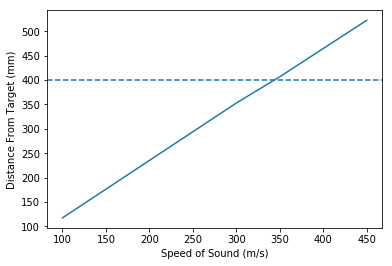

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of the values of c that were used to calculate distance
c = np.array([100., 150., 200., 250., 300., 350., 400., 450.])
# Create an array of the values of 'distance' measured by your sensor
distance_measured = np.array([117.,176.,235.,294.,353.,407.,465.,523.])

# Create a plot that shows the relationship between 'c' and 'distance'
plt.plot(c,distance_measured)
# Draw a line at the known distance
# Insert the expected measurement (in mm) as y in the line below
plt.axhline(y=400.,linestyle='--')
plt.xlabel('Speed of Sound (m/s)')
plt.ylabel('Distance From Target (mm)')
plt.show()

Based on the intercept of the dashed line (your known distance) and the solid line (the measured distance at sound speed *c*), create a new list of values for `c` at a finer resolution (intervals of 5?  intervals of 3?) that will help you zoom in on the `c` value of that intercept.

Define a new set of values for `c` on your ESP8266 as you did above, and determine a new set of vales for `distance`.  Copy and edit the code you ran in canopy, inserting your new values of `c` and `distance` to create a second figure.

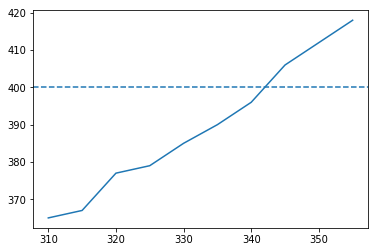

In [2]:
c = np.array([310, 315, 320, 325, 330, 335, 340, 345, 350, 355])
distance_measured = np.array([365.0, 367.0, 377.0, 379.0, 385.0, 390.0, 396.0, 406.0, 412.0, 418.0])
plt.plot(c,distance_measured)
plt.axhline(y=400,linestyle='--')
plt.show()

Try increasing the resolution of  `c` one more time, trying values with an interval of 1.  Again, define a new set of values for `c` on your ESP8266 and determine a new set of vales for `distance`.  Create a third figure with the data.

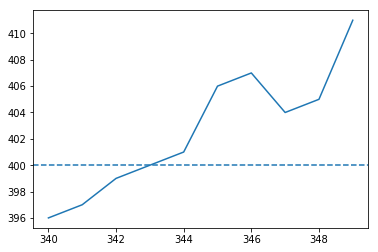

In [3]:
c = np.array([340, 341, 342, 343, 344, 345, 346, 347, 348, 349])
distance_measured = np.array([396.0, 397.0, 399.0, 400.0, 401.0, 406.0, 407.0, 404.0, 405.0, 411.0])
plt.plot(c,distance_measured)
plt.axhline(y=400,linestyle='--')
plt.show()

Based on the data and figures, what do you estimate the speed of sound in air to be?  What do you notice about the variability in the distance measurements as you increase the resolution of your `c` list?  What would you do to improve accuracy of your measurement?

Now that you have a more accurate value for the speed of sound, test the limits of your sensor.  Does there appear to be a minimum distance you can measure?  Does there appear to be a maximum distance?  What happens when it seems like you might be too far away or too close to take a measurement?

Connect your ESP8266 to the OTCnet network and submit your estimated value for speed of sound as a message to the MQTT server in the form of a string to the **\oc351\c_values** topic by editing the following code wherever there are '\*' (don't include the '\*' in your code):

`from simple import MQTTClient
from time import sleep_ms
server='192.168.89.97'
umqtt_client =` *Your Name*
`c = MQTTClient(umqtt_client, server,user='`*Your Username*`',password='`*Your Password*`')
sleep_ms(2000)      # sleep for 2 s
c.connect()
sleep_ms(2000)      # sleep for 2 s
pub_topic='ocn351/'+'c_values'
msg=`*Your Name*` + `str(*Your Speed of Sound Value*`)
c.publish(pub_topic,msg,qos=1,retain=True)`

# Part 2: Mapping the Seafloor

For this activity, you will be using a **HCSR04** 40 kHz ultrasonic sensor to determine the bathymetry along the MSB dock.  The HCSR04 sensor sends out a pulse of sound through one transducer, and listens for the echo return in the second transducer.  Based on the delay between sending the signal and receiving an echo back, you will be able to determine how far away an object is from the sensor.

This activity uses the waterproof transducer version of the HCSR04 ultrasonic acoustic sensor to create a rough bathymetric chart of a region of off a pier or dock.  For this excercise you will collect measurements of the depth to the seafloor along the Marine Sciences Building dock with 1 meter spacing.

## Assembling your HCSR04 Sensor
Begin by connecting the **HCSR04** to your **ESP8266**.  The HCSR04 requires 5 volts, so for this excersize you will use your microcontroller in a breadboard, powered by the USB cable from your computer  The USB cable provides 5V to the board, which means we can use the *V+* pin on the ESP8266 to give 5V to the HCSR04.

The HCSR04 sensor has 4 pins, *GND*, *VCC*, *Trig*, and *Echo*.  For this excercise, connect the *trig* pin on the HCSR04 to GPIO pin 12 on the ESP8266, and the *echo* pin to GPIO pin 14.  Connect *GND* to *GND* and *VCC* to *V+*.

The driver for this sensor is already included in the firmware on your **ESP8266** as a module named `hcsr04`.  We can define our sensor using the following code.  We will proceed by estimating that the speed of sound in fresh water is **1500 meters per second**, so we will define our variable `c` as 1500:

`import hcsr04
sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = 1500)`

The `hcsr04.HCSR04` class requires three input variable:
- `trigger_pin`,  the GPIO pin on the ESP8266 corresponding to the **trig** pin on the HCSR04
- `echo_pin`,  the GPIO pin on the ESP8266 corresponding to the **echo** pin on the HCSR04
- `c`, the speed of sound to use to calculate distance


## Measuring Distance
Once your sensor variable is defined, you can take a measurement by executing the function `distance`:

`sensor.distance()`

Your ESP8266 should return an integer value that corresponds to the distance of the object in front of the sensor in **millimeters**.  Try pointing your sensor at an object and moving it closer and further away from it while taking measurements to see how the value changes.

Test the limits of your sensor.  Does there appear to be a minimum distance you can measure?  Does there appear to be a maximum distance?  What happens when it seems like you might be too far away or too close to take a measurement?  How accurate do the measurements appear to be when collected in air?

## Bathymetry Measurements
You will be using the HCSR04 to collect measurements of depth at a series of fixed positions along the dock.  Using the tape measure, start at the western corner of the dock and take a measurement at 1 meter spacing.  Lower the transducer into the water to the tape mark indicating 10cm is at the surface.  Collect and record samples in the following format:

|Distance on Dock (m) | Depth (mm)|
| :---:  |  :---: |
|1| Meaurement \#1,  \#2,  \#3,  \#4,  \#5|
|2| Meaurement \#1,  \#2,  \#3,  \#4,  \#5|
|...|...|
|*n*| Meaurement \#1,  \#2,  \#3,  \#4,  \#5|

Collect repeat samples at each fixed distance point.  Do all of the values collected appear to be valid?

Once your sample table is complete, create a plot of the bathymetry in *Canopy* using the Python code below.  For the depth value, take the median of the measurements at each distance that you believe to be correct in order to remove bad samples or noise.  

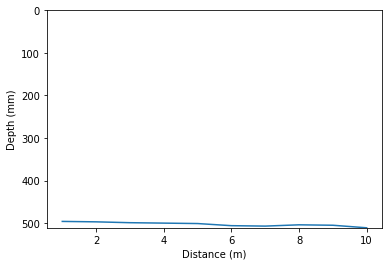

In [4]:
import matplotlib.pyplot as plt # Import the pyplot library
import numpy as np # Import the numpy library

# Create an array of values for the distance along the dock
Distance = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Create an array of values for the distance measured by the sensor (in mm)
Depth = np.array([396.0, 397.0, 399.0, 400.0, 401.0, 406.0, 407.0, 404.0, 405.0, 411.0])
Depth = Depth+100. # Add 10cm to the measurements to correct for the depth of the transducer
plt.plot(Distance,Depth) # Plot the depth at each distance
plt.ylim((0,max(Depth))) # Set the y-axis limits
plt.gca().invert_yaxis() # Invert the y-axis so the water surface is at the top of the figure
plt.xlabel('Distance (m)') # Label the x-axis
plt.ylabel('Depth (mm)') # Label the y-axis
plt.show() # Show the figure

What features, if any, do you see along the bottom?  